In [171]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [172]:
playstore = pd.read_csv("data/googleplaystore.csv")

In [173]:
# bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore
playstore = pd.read_csv("data/googleplaystore.csv")


# Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)
#playstore.drop_duplicates()
playstore.drop_duplicates(subset =["App"], keep = 'first', inplace=True) 

# bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar
playstore.drop([10472], inplace=True)

# Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai

playstore.Category = playstore.Category.astype('category')

# Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace(',', ''))
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace('+', ''))

# bagian untuk mengubah tipe data Installs
playstore['Installs'] = playstore['Installs'].astype('int64')

# Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

# Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float
playstore['Price'] = playstore['Price'].apply(lambda x: x.replace('$',''))
playstore['Price'] = playstore['Price'].astype('float')

# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer
playstore[['Reviews','Size','Installs']]= playstore[['Reviews','Size','Installs']].astype('int64')

In [174]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [175]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13134701,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [176]:
df2 = playstore.copy()
top_category = pd.crosstab(
    index=df2['Category'],
    columns='Jumlah'
).sort_values(by='Jumlah',ascending=False).reset_index()

In [177]:
top_category['Category'][0]

'FAMILY'

In [178]:
top_category['Jumlah'][0]

1832

In [179]:
top_category

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [180]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13134701,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [181]:
df2 = playstore.copy()
rev_table1=df2.groupby(['Category','App']).agg({
    'Reviews': 'sum',
    'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10)

In [182]:
rev_table1['Category']

0           SOCIAL
1    COMMUNICATION
2           SOCIAL
3    COMMUNICATION
4             GAME
5            TOOLS
6             GAME
7    VIDEO_PLAYERS
8            TOOLS
9             GAME
Name: Category, dtype: category
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., TOOLS, TRAVEL_AND_LOCAL, VIDEO_PLAYERS, WEATHER]

In [183]:
rev_table1

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [184]:
rev_table = df2.groupby(['Category','App']).agg({
                    'Reviews': 'sum',
                    'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10)

In [185]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [186]:
def index():
    df2 = playstore.copy()

    # Statistik
    # Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
    # Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan 'Jumlah'
    # sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. 
    #Terakhir reset index dari dataframe top_category 
    top_category = pd.crosstab(
    index=df2['Category'],
    columns='Jumlah'
    ).sort_values(by='Jumlah',ascending=False).reset_index()
    
    # Dictionary stats digunakan untuk menyimpan beberapa data yang digunakan untuk menampilkan nilai di value box dan tabel
    stats = {
        # Ini adalah bagian untuk melengkapi konten value box 
        # most category mengambil nama category paling banyak mengacu pada dataframe top_category
        # total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe top_category
        'most_categories' :top_category['Jumlah'][0],
        'total': top_category['Jumlah'][0],
        # rev_table adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna. 
        # Silahkan melakukan agregasi data yang tepat menggunakan groupby untuk menampilkan 10 aplikasi yang diurutkan berdasarkan 
        # jumlah Review pengguna. Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
        # Agregasi Anda dinilai benar jika hasilnya sama dengan tabel yang terlampir pada file ini
        
        
        rev_table : df2.groupby(['Category','App']).agg({
                    'Reviews': 'sum',
                    'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10).to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
    }

In [187]:
 rev_table = df2.groupby(['Category','App']).agg({
                    'Reviews': 'sum',
                    'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10).to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])

In [188]:
rev_table

'<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Category</th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>SOCIAL</td>\n      <td>Facebook</td>\n      <td>78158306.0</td>\n      <td>4.1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>COMMUNICATION</td>\n      <td>WhatsApp Messenger</td>\n      <td>69119316.0</td>\n      <td>4.4</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>SOCIAL</td>\n      <td>Instagram</td>\n      <td>66577313.0</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>COMMUNICATION</td>\n      <td>Messenger – Text and Video Chat for Free</td>\n      <td>56642847.0</td>\n      <td>4.0</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>GAME</td>\n      <td>Clash of Clans</td>\n      <td>44891723.0</td>\n  

In [189]:
cat_order

,Category,Total
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395


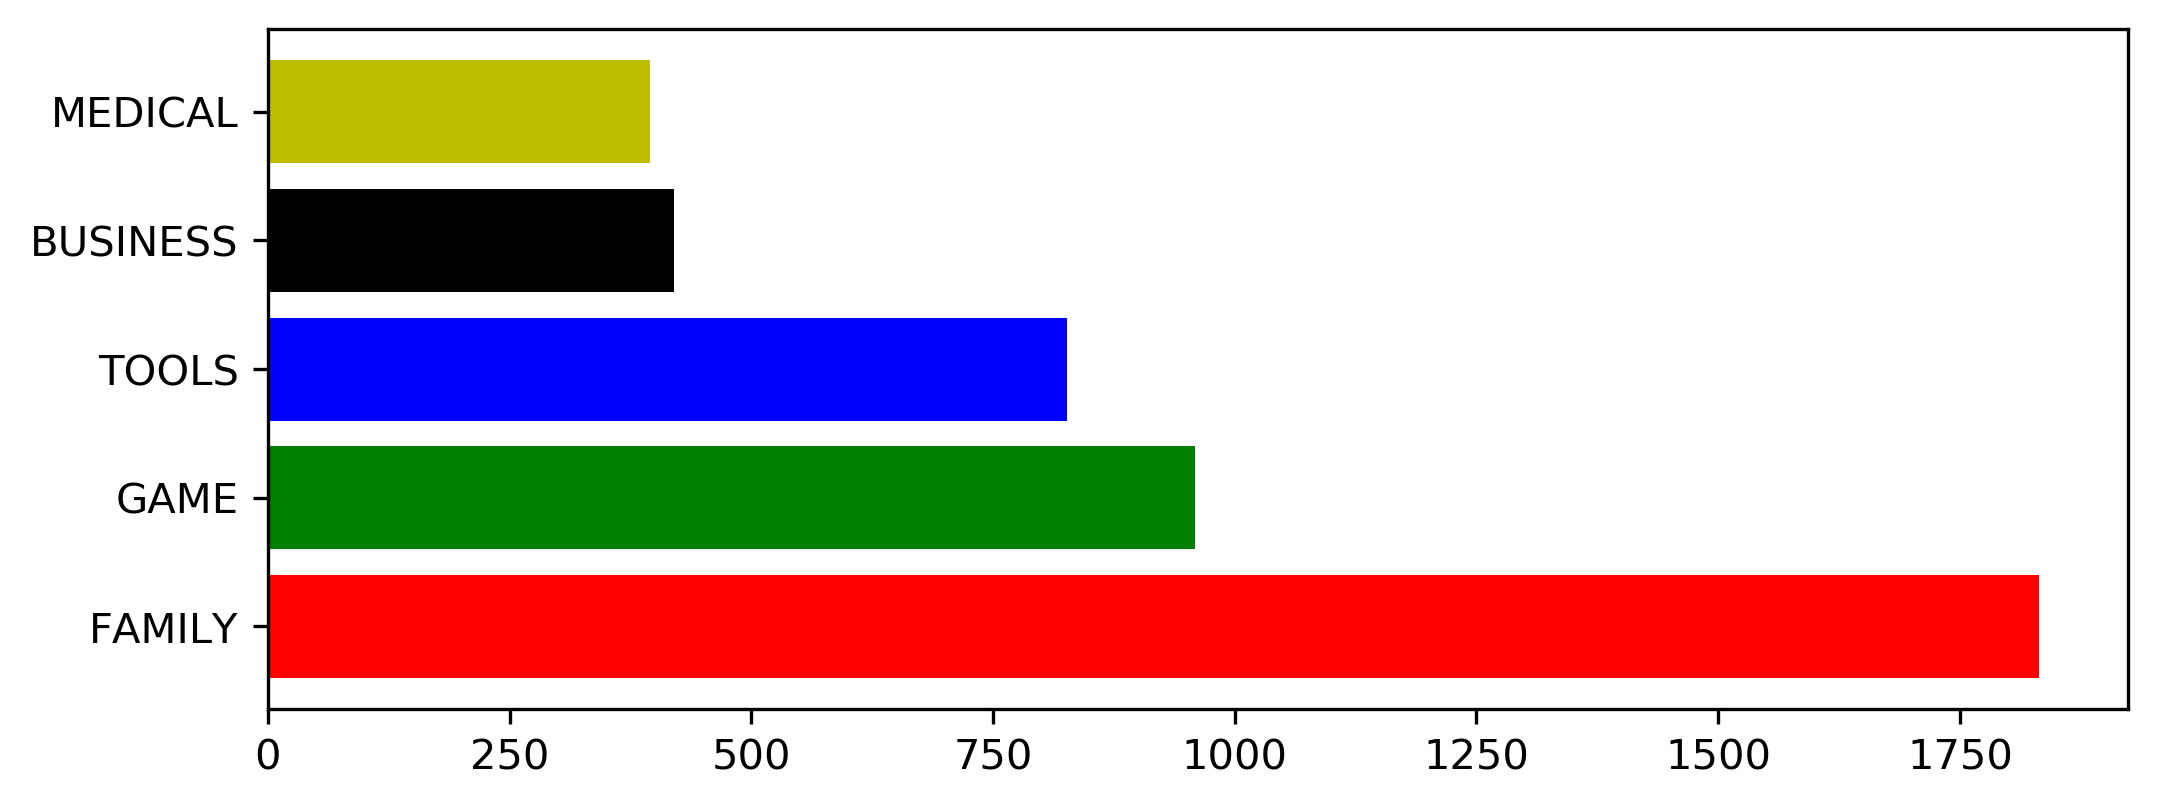

In [190]:
    ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category
    ## dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
   
    cat_order = df2.groupby('Category').agg({
     'App' : 'count'
    }).reset_index().rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()
    
    X = cat_order['Category']
    Y = cat_order['Total']
    
    my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
    plt.barh(X,Y, color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 
    
    # bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    # variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
    # halaman html
    result = str(figdata_png)[2:-1]

In [191]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

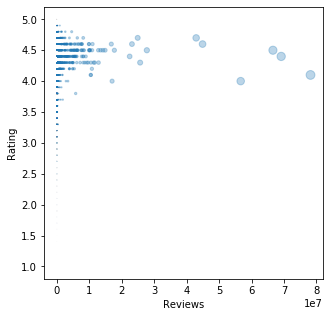

In [192]:
    ## Scatter Plot
    # Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
    # Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    X = df2['Reviews'].values # axis x
    Y = df2['Rating'].values # axis y
    area = playstore['Reviews'].values/1000005 # ukuran besar/kecilnya lingkaran scatter plot
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
    plt.scatter(x=X,y=Y, s=area, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')
    plt.savefig('rev_rat.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result2 = str(figdata_png)[2:-1]


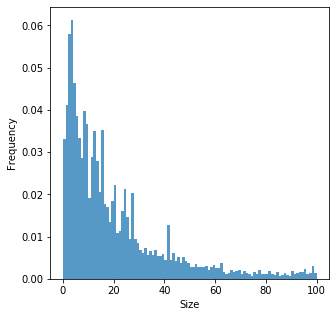

In [193]:
    ## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
    X=(df2['Size']/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(X,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.savefig('hist_size.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result3 = str(figdata_png)[2:-1]


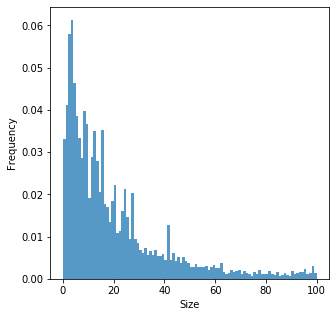

In [194]:
    ## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
    X=(df2['Size']/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(X,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.savefig('hist_size.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result3 = str(figdata_png)[2:-1]


In [195]:
    # Dictionary stats digunakan untuk menyimpan beberapa data yang digunakan untuk menampilkan nilai di value box dan tabel
    stats = {
        # Ini adalah bagian untuk melengkapi konten value box 
        # most category mengambil nama category paling banyak mengacu pada dataframe top_category
        # total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe top_category
        'most_categories' :top_category['Jumlah'][0],
        'total': top_category['Jumlah'][0],
        # rev_table adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna. 
        # Silahkan melakukan agregasi data yang tepat menggunakan groupby untuk menampilkan 10 aplikasi yang diurutkan berdasarkan 
        # jumlah Review pengguna. Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
        # Agregasi Anda dinilai benar jika hasilnya sama dengan tabel yang terlampir pada file ini


         rev_table : df2.groupby(['Category','App']).agg({
        'Reviews': 'sum',
        'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10).to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
    }

In [196]:
 rev_table = df2.groupby(['Category','App']).agg({
        'Reviews': 'sum',
        'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10)

In [197]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [198]:
stats

{'most_categories': 1832,
 'total': 1832,
 '<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Category</th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>SOCIAL</td>\n      <td>Facebook</td>\n      <td>78158306.0</td>\n      <td>4.1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>COMMUNICATION</td>\n      <td>WhatsApp Messenger</td>\n      <td>69119316.0</td>\n      <td>4.4</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>SOCIAL</td>\n      <td>Instagram</td>\n      <td>66577313.0</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>COMMUNICATION</td>\n      <td>Messenger – Text and Video Chat for Free</td>\n      <td>56642847.0</td>\n      <td>4.0</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>GAME</td>\n      <td>Clash o

In [199]:
table1=df2.groupby(['Category','App']).agg({
    'Reviews': 'sum',
    'Rating': 'mean'}).sort_values(by=['Reviews','Rating'],ascending=False).reset_index().head(10)

In [200]:
table1

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


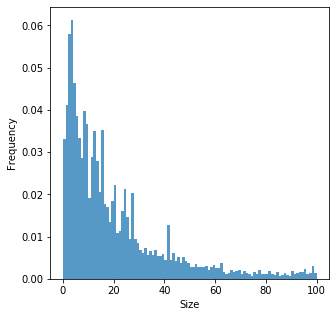

In [201]:
    X=(df2['Size']/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(X,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.savefig('hist_size.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result3 = str(figdata_png)[2:-1]

In [202]:
    top_category = pd.crosstab(
    index=df2['Category'],
    columns='Jumlah'
    ).sort_values(by='Jumlah',ascending=False).reset_index()

In [203]:
df2['Genres'].astype('category')

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 9659, dtype: category
Categories (118, object): [Action, Action;Action & Adventure, Adventure, Adventure;Action & Adventure, ..., Video Players & Editors;Creativity, Video Players & Editors;Music & Video, Weather, Word]

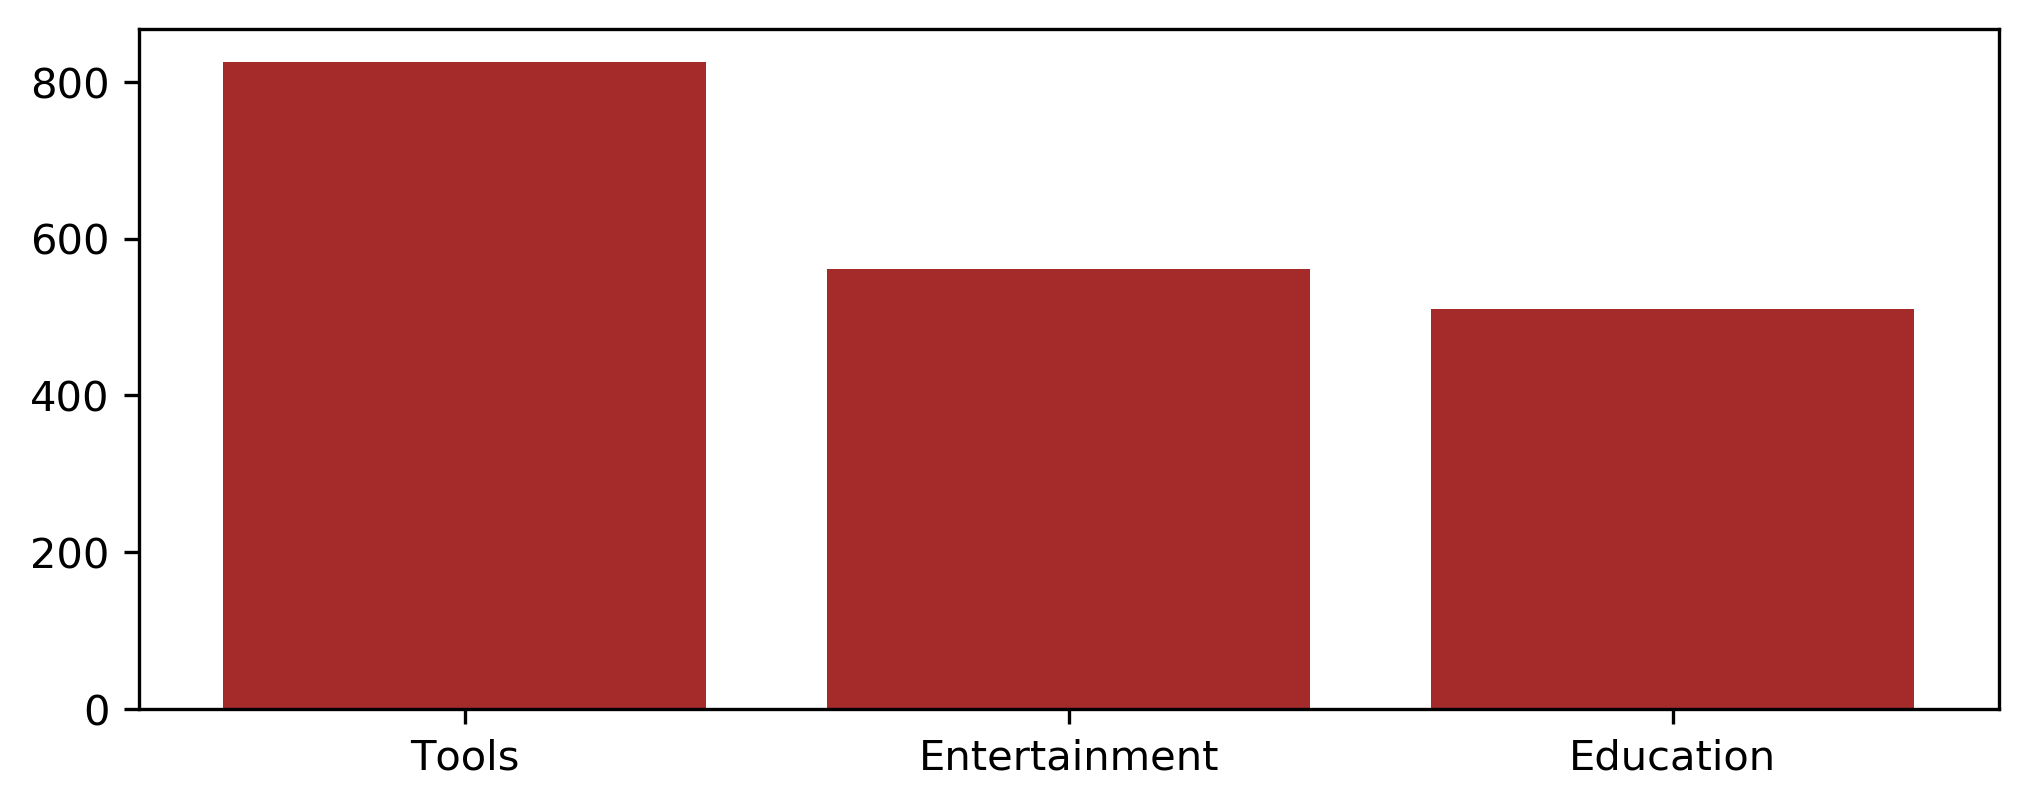

In [204]:
    ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category
    ## dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
   
    cat_order = df2.groupby('Genres').agg({
     'App' : 'count'
    }).reset_index().rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head(3)
    
    X = cat_order['Genres']
    Y = cat_order['Total']
    
    my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
    plt.bar(X,Y, color='brown')
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 
    
    # bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    # variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
    # halaman html
    result4 = str(figdata_png)[2:-1]

In [205]:
df3 = df2.copy()
df3['Last Updated'] =  pd.to_datetime(df3['Last Updated'])
df3['Month_Update'] =df3['Last Updated'] .dt.to_period('M')


Month_Update = df3.groupby('Month_Update').agg({
      'App' : 'count'
}).reset_index().rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head(5)
    
Month_Update['Month_Update'] = Month_Update['Month_Update'].astype('category')

In [206]:
Month_Update

,Month_Update,Total
86,2018-07,2320
87,2018-08,977
85,2018-06,913
84,2018-05,691
82,2018-03,407


In [207]:
stats

{'most_categories': 1832,
 'total': 1832,
 '<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Category</th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>SOCIAL</td>\n      <td>Facebook</td>\n      <td>78158306.0</td>\n      <td>4.1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>COMMUNICATION</td>\n      <td>WhatsApp Messenger</td>\n      <td>69119316.0</td>\n      <td>4.4</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>SOCIAL</td>\n      <td>Instagram</td>\n      <td>66577313.0</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>COMMUNICATION</td>\n      <td>Messenger – Text and Video Chat for Free</td>\n      <td>56642847.0</td>\n      <td>4.0</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>GAME</td>\n      <td>Clash o